<a href="https://colab.research.google.com/github/8Chatea8/HeadChecker/blob/main/data/Data_PART1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import zipfile
import os
import glob

In [3]:
zip_files = glob.glob('/content/drive/MyDrive/Aiffel-MahiMahi/data/Training/TL_Part1_*.zip')
len(zip_files) # 6

21

In [4]:
SO_files = []
PO_files = []
LC_files = []
IS_files = []
GB_files = []
ET_files = []
EC_files = []

for f in zip_files:
    if 'SO' in f:
        SO_files.append(f)
    elif 'PO' in f:
        PO_files.append(f)
    elif 'LC' in f:
        LC_files.append(f)
    elif 'IS' in f:
        IS_files.append(f)
    elif 'GB' in f:
        GB_files.append(f)
    elif 'ET' in f:
        ET_files.append(f)
    elif 'EC' in f:
        EC_files.append(f)
    else:
        print('something else wrong')

files_list = [SO_files, PO_files, LC_files,IS_files,GB_files,ET_files,EC_files]

for files in files_list:
    print(len(files))

3
3
3
3
3
3
3


In [5]:
for zip in SO_files:
    zip_file = zipfile.ZipFile(zip)
    zip_file.extractall('/content/sample_data/Part1_SO/')

In [6]:
for zip in PO_files:
    zip_file = zipfile.ZipFile(zip)
    zip_file.extractall('/content/sample_data/Part1_PO/')

In [7]:
for zip in LC_files:
    zip_file = zipfile.ZipFile(zip)
    zip_file.extractall('/content/sample_data/Part1_LC/')

In [8]:
for zip in IS_files:
    zip_file = zipfile.ZipFile(zip)
    zip_file.extractall('/content/sample_data/Part1_IS/')

In [9]:
for zip in GB_files:
    zip_file = zipfile.ZipFile(zip)
    zip_file.extractall('/content/sample_data/Part1_GB/')

In [10]:
for zip in ET_files:
    zip_file = zipfile.ZipFile(zip)
    zip_file.extractall('/content/sample_data/Part1_ET/')

In [11]:
for zip in EC_files:
    zip_file = zipfile.ZipFile(zip)
    zip_file.extractall('/content/sample_data/Part1_EC/')

In [16]:
category_list = ['SO', 'PO', 'LC', 'IS', 'GB', 'ET', 'EC']

In [ ]:
for cate in category_list:
    data_files = glob.glob(f'/content/sample_data/Part1_{cate}/*.json')
    data = pd.DataFrame()
    for files in data_files:
        df = pd.read_json(files)
        df = df.transpose()
        df = df[['newsTitle', 'newsContent', 'clickbaitClass']]
        df.iloc[0, 2] = df.iloc[1, 2]
        df = df.drop('labeledDataInfo', axis=0)
        data = pd.concat([data, df])
    data = data.reset_index(drop=True)
    data.columns = ['Headline', 'Content', 'Class']
    data.to_csv(f'/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/Part1/Part1_{cate}.csv')

In [19]:
data_so = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/Part1/Part1_SO.csv")
data_po = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/Part1/Part1_PO.csv")
data_lc = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/Part1/Part1_LC.csv")
data_is = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/Part1/Part1_IS.csv")
data_gb = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/Part1/Part1_GB.csv")
data_et = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/Part1/Part1_ET.csv")
data_ec = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/Part1/Part1_EC.csv")

In [20]:
print(len(data_so))
print(len(data_po))
print(len(data_lc))
print(len(data_is))
print(len(data_gb))
print(len(data_et))
print(len(data_ec))

57091
39377
31640
40292
44976
36019
42063


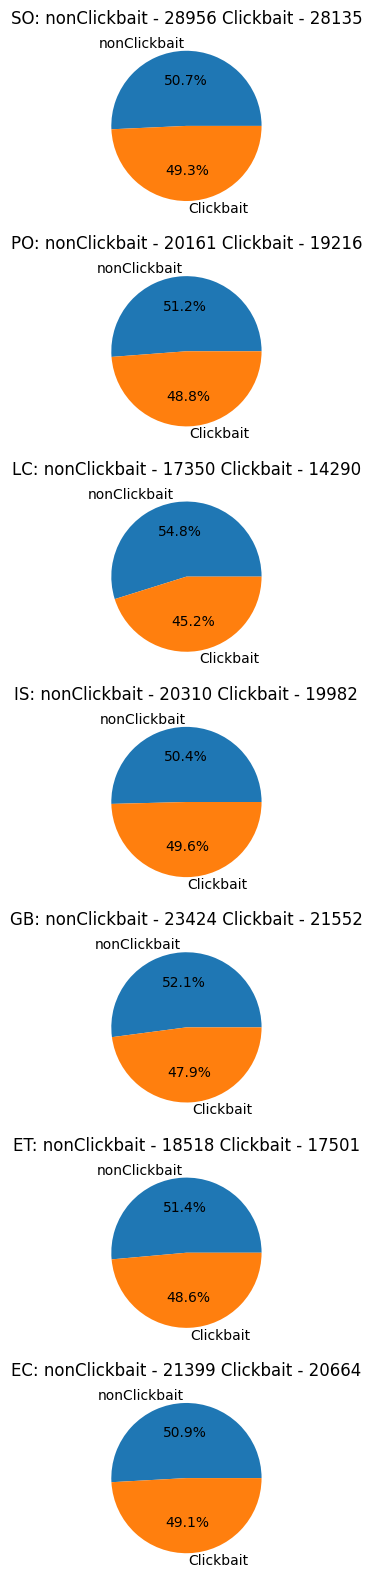

In [23]:
import matplotlib.pyplot as plt

data_list = [data_so, data_po, data_lc, data_is, data_gb, data_et, data_ec]
category_list = ['SO', 'PO', 'LC', 'IS', 'GB', 'ET', 'EC']

plt.figure(figsize=(7, 20))

for i in range(len(data_list)):
    df = data_list[i]
    plt.subplot(7, 1, i+1)
    num1, num2 = df['Class'].value_counts()
    plt.pie([num1, num2], labels=['nonClickbait', 'Clickbait'], autopct='%.1f%%')
    plt.title(f'{category_list[i]}: nonClickbait - {num1} Clickbait - {num2}')

plt.show()


In [24]:
data_ALL = pd.concat([data_so, data_po, data_lc, data_is, data_gb, data_et, data_ec])
data_ALL.to_csv('/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/Part1/Part1_ALL.csv')
data_PIEE = pd.concat([data_po, data_is, data_et, data_ec])
data_PIEE.to_csv('/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/Part1/Part1_PIEE.csv')
data_PE = pd.concat([data_po, data_et])
data_PE.to_csv('/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/Part1/Part1_PE.csv')

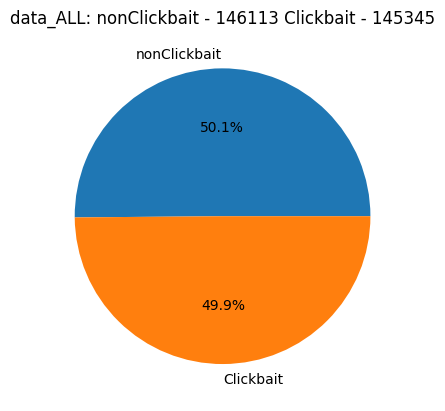

In [25]:
num1, num2 = data_ALL['Class'].value_counts()
plt.pie([num1, num2], labels=['nonClickbait', 'Clickbait'], autopct='%.1f%%')
plt.title(f'data_ALL: nonClickbait - {num1} Clickbait - {num2}')
plt.show()

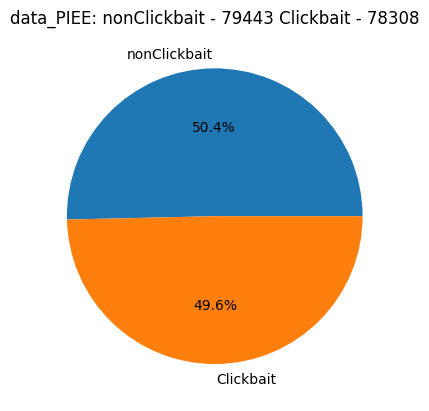

In [26]:
num1, num2 = data_PIEE['Class'].value_counts()
plt.pie([num1, num2], labels=['nonClickbait', 'Clickbait'], autopct='%.1f%%')
plt.title(f'data_PIEE: nonClickbait - {num1} Clickbait - {num2}')
plt.show()

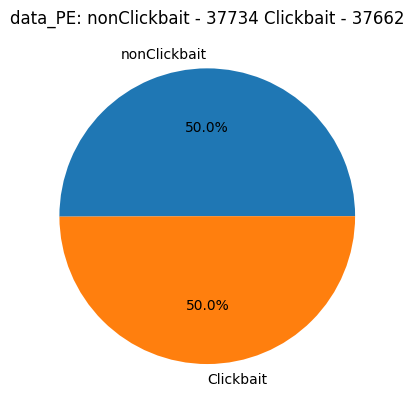

In [27]:
num1, num2 = data_PE['Class'].value_counts()
plt.pie([num1, num2], labels=['nonClickbait', 'Clickbait'], autopct='%.1f%%')
plt.title(f'data_PE: nonClickbait - {num1} Clickbait - {num2}')
plt.show()

In [28]:
import re

def preprocess_sentence(sentence):
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub(r'\[[^]]*\]', '', sentence) # [] 닫힌 문자열 제거
    sentence = re.sub(r'\\"','', sentence) # 쌍따옴표 \" 제거
    sentence = re.sub(r'\'', '', sentence) # 따옴표 ' 제거
    return sentence

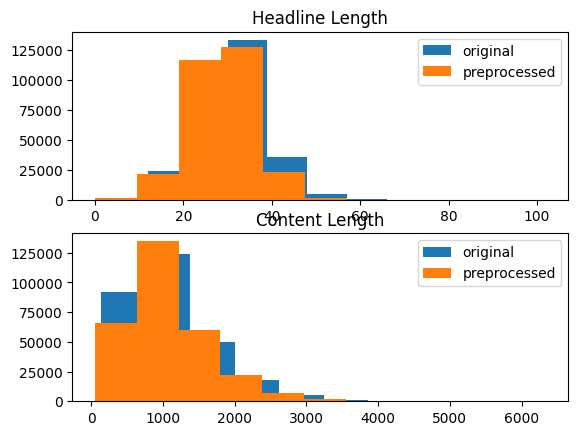

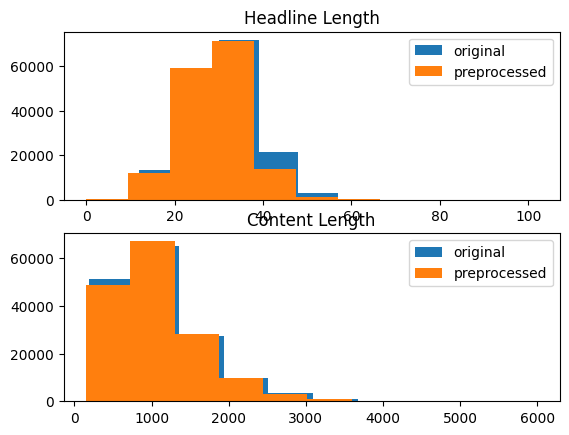

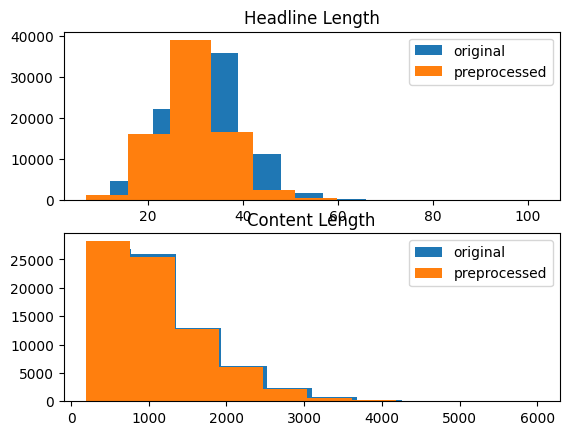

In [29]:
data_list = [data_ALL, data_PIEE, data_PE]

for df in data_list:
    df['cleanHeadline'] = df['Headline'].apply(lambda x: preprocess_sentence(x))
    df['cleanContent'] = df['Content'].apply(lambda x: preprocess_sentence(x))
    df['HeadLength'] = df['Headline'].apply(lambda x: len(x))
    df['ContLength'] = df['Content'].apply(lambda x: len(x))
    df['cleanHeadLength'] = df['cleanHeadline'].apply(lambda x: len(x))
    df['cleanContLength'] = df['cleanContent'].apply(lambda x: len(x))

    plt.subplot(2, 1, 1)
    plt.hist(df['HeadLength'], label='original')
    plt.hist(df['cleanHeadLength'], label='preprocessed')
    plt.title('Headline Length')
    plt.legend()

    plt.subplot(2,1,2)
    plt.hist(df['ContLength'], label='original')
    plt.hist(df['cleanContLength'], label='preprocessed')
    plt.title('Content Length')
    plt.legend()

    plt.show()

In [33]:
name = ['data_ALL', 'data_PIEE', 'data_PE']
for i, df in enumerate(data_list):
    sample_df = df[['cleanHeadline', 'cleanContent', 'Class']].copy()
    sample_df.columns = ['Headline', 'Content', 'Class']
    print(sample_df.shape)
    sample_df.to_csv(f'/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/Part1/{name[i]}.csv', encoding='utf-8')

(291458, 3)
(157751, 3)
(75396, 3)
